In [7]:
#1. Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import Seaborn
import seaborn as sns
# This allows plots to appear on the IPython notebook.
%matplotlib inline
import matplotlib.cm as cm # import the colormap library
import operator
#2. Read dataframe "route_edges_am"
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
#3. Let's define an empty undirected graph "RG".
RG = nx.Graph()
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
for row in df.itertuples(index=False):    
    values = row[2:]    
    edge_attributes = dict(zip(keys, values))    
    my_tuple = (row[0], row[1])   
    RG.add_edge(*my_tuple, attr_dict=edge_attributes)
#4. Read dataframe of node with coordinates
nodes_df = pd.read_csv("data/riyadh_nodes.txt", sep=" ", index_col=0)
nodes_df.head(1)
#5. Adding coordinates to nodes in nx.Graph() RG
for node_id in RG.nodes():
    RG.node[node_id]["coordinate"] = (nodes_df['st_x'][node_id], nodes_df['st_y'][node_id])
#6. Read dataframe of foursquareCheckinNodes.csv
fsq_nodes = pd.read_csv('data/FoursqureCheckinNodes.csv', sep=",")
ID = fsq_nodes['ID']
NAME = fsq_nodes['NAME']
CATEGORY = fsq_nodes['CATEGORY']
CHECKIN = fsq_nodes['CHECK-IN']
LAT = fsq_nodes['LAT']
LONG = fsq_nodes['LONG']
#7. Now we build a Graph "fsq_G" to store the checkin points for foursqure
FSQ = nx.Graph()
coordinate_fsq = []
#We also define the values dictionary for the "node attributes"
for i in range(len(ID)):
        coordinate_fsq.append((LONG[i], LAT[i]))
        FSQ.add_node(i,fsq_id=ID[i],coordinate=((LONG[i], LAT[i])),
                     checkin=CHECKIN[i],name=NAME[i],category=CATEGORY[i])
#8. **Now we build a new dictionary dict_checkin to sort maximum checkin point**
dict_checkin = {}
for i in FSQ.nodes():
    dict_checkin[i] = FSQ.node[i]["checkin"]    
sorted_checkin = sorted(dict_checkin.items(), key = operator.itemgetter(1))
sorted_checkin.reverse()
#9. **Here we define the first X maximum checkin nodes to use**
MAX=[]
for i in range(len(FSQ.nodes())): 
    MAX.append(FSQ.node[sorted_checkin[i][0]]) # Maximum checkin node
##print MAX[:3]
#10. ********************Now we found the nearest nodes to the maximun checkin nodes
start_list = []
for i in MAX: # change back to MAX when need to rank nodes
    #print i['coordinate']
    dist_fsq = {}
    for node_id in RG.nodes():
        dist_fsq[node_id] = round(abs(i['coordinate'][0] -RG.node[node_id]["coordinate"][0])
        +abs(i['coordinate'][1] -RG.node[node_id]["coordinate"][1]),6)
    tmp_sort= sorted(dist_fsq.items(), key = operator.itemgetter(1))
    start_list.append(tmp_sort[0][0])    
#11. ******** Now we add the nearest node id to the FSQ.Graph()
for i in range(len(start_list)):
    FSQ.node[i]['closest_node']= start_list[i]
print "* Total checkin points is: " + str(len(start_list))
print "* Top 20 Maximum Checkin Starting Nodes are: " + str(start_list[:20])

#13. Right way to call edge, node attributes as visualization reference
edges = RG.edges()
weights = [RG[u][v]["volume"]*0.001+1 for u,v in edges]
loc_dict = {}
for node_index in RG.nodes():
    loc_dict[node_index] = RG.node[node_index]["coordinate"]

#14. If I pick any two intersections, is it possible to find a route? Check if the network is connected.
print "* Is the road network connected? "+ str(nx.is_connected(RG))

#16. Define a function 'degree2km' transfer coordinates to distance unit in KM
def degree2km(origin, destination):
    lat1, lon1 = RG.node[origin]['coordinate']
    lat2, lon2 = RG.node[destination]['coordinate']
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

* Total checkin points is: 448
* Top 20 Maximum Checkin Starting Nodes are: [7601, 5808, 4590, 8716, 8960, 1274, 7546, 10084, 1062, 746, 7565, 3317, 4374, 6585, 705, 7408, 8716, 745, 6677, 7935]
* Is the road network connected? True


In [1]:
#1. Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import Seaborn
import seaborn as sns
# This allows plots to appear on the IPython notebook.
%matplotlib inline
import matplotlib.cm as cm # import the colormap library
import operator
#2. Read dataframe "route_edges_am"
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
#3. Let's define an empty undirected graph "RG".

In [8]:
#Change the number i in [start_list[i]] from 1 to 40**************************************************#####change_Here
start_node = start_list[0:29]
start_node.extend([9071,161,9150,2279,5718,9098,4584,6354,8897,10721,72]) # airport node #9071
print start_node
print len(start_node)
print start_node[29:]

[7601, 5808, 4590, 8716, 8960, 1274, 7546, 10084, 1062, 746, 7565, 3317, 4374, 6585, 705, 7408, 8716, 745, 6677, 7935, 9235, 4080, 1395, 1078, 7851, 3986, 3239, 6051, 2519, 9071, 161, 9150, 2279, 5718, 9098, 4584, 6354, 8897, 10721, 72]
40
[9071, 161, 9150, 2279, 5718, 9098, 4584, 6354, 8897, 10721, 72]


* Done writting txt flie with Start Node: 9071
* Done Caculate 5019 paths from Node_9071
* The max_time/Minute is: ((797, 798), 16.36)and max_distance/KM is: ((307, 308), 18.47)
Done writting JSON file and PNG file with Start Node: 9071

* Done writting txt flie with Start Node: 161
* Done Caculate 5021 paths from Node_161
* The max_time/Minute is: ((7631, 7630), 23.87)and max_distance/KM is: ((7751, 7750), 26.85)
Done writting JSON file and PNG file with Start Node: 161

* Done writting txt flie with Start Node: 9150
* Done Caculate 5026 paths from Node_9150
* The max_time/Minute is: ((2143, 5258), 22.85)and max_distance/KM is: ((6511, 6510), 21.47)
Done writting JSON file and PNG file with Start Node: 9150

* Done writting txt flie with Start Node: 2279
* Done Caculate 5014 paths from Node_2279
* The max_time/Minute is: ((6741, 996), 26.45)and max_distance/KM is: ((902, 7081), 30.16)
Done writting JSON file and PNG file with Start Node: 2279

* Done writting txt flie with Start Node:

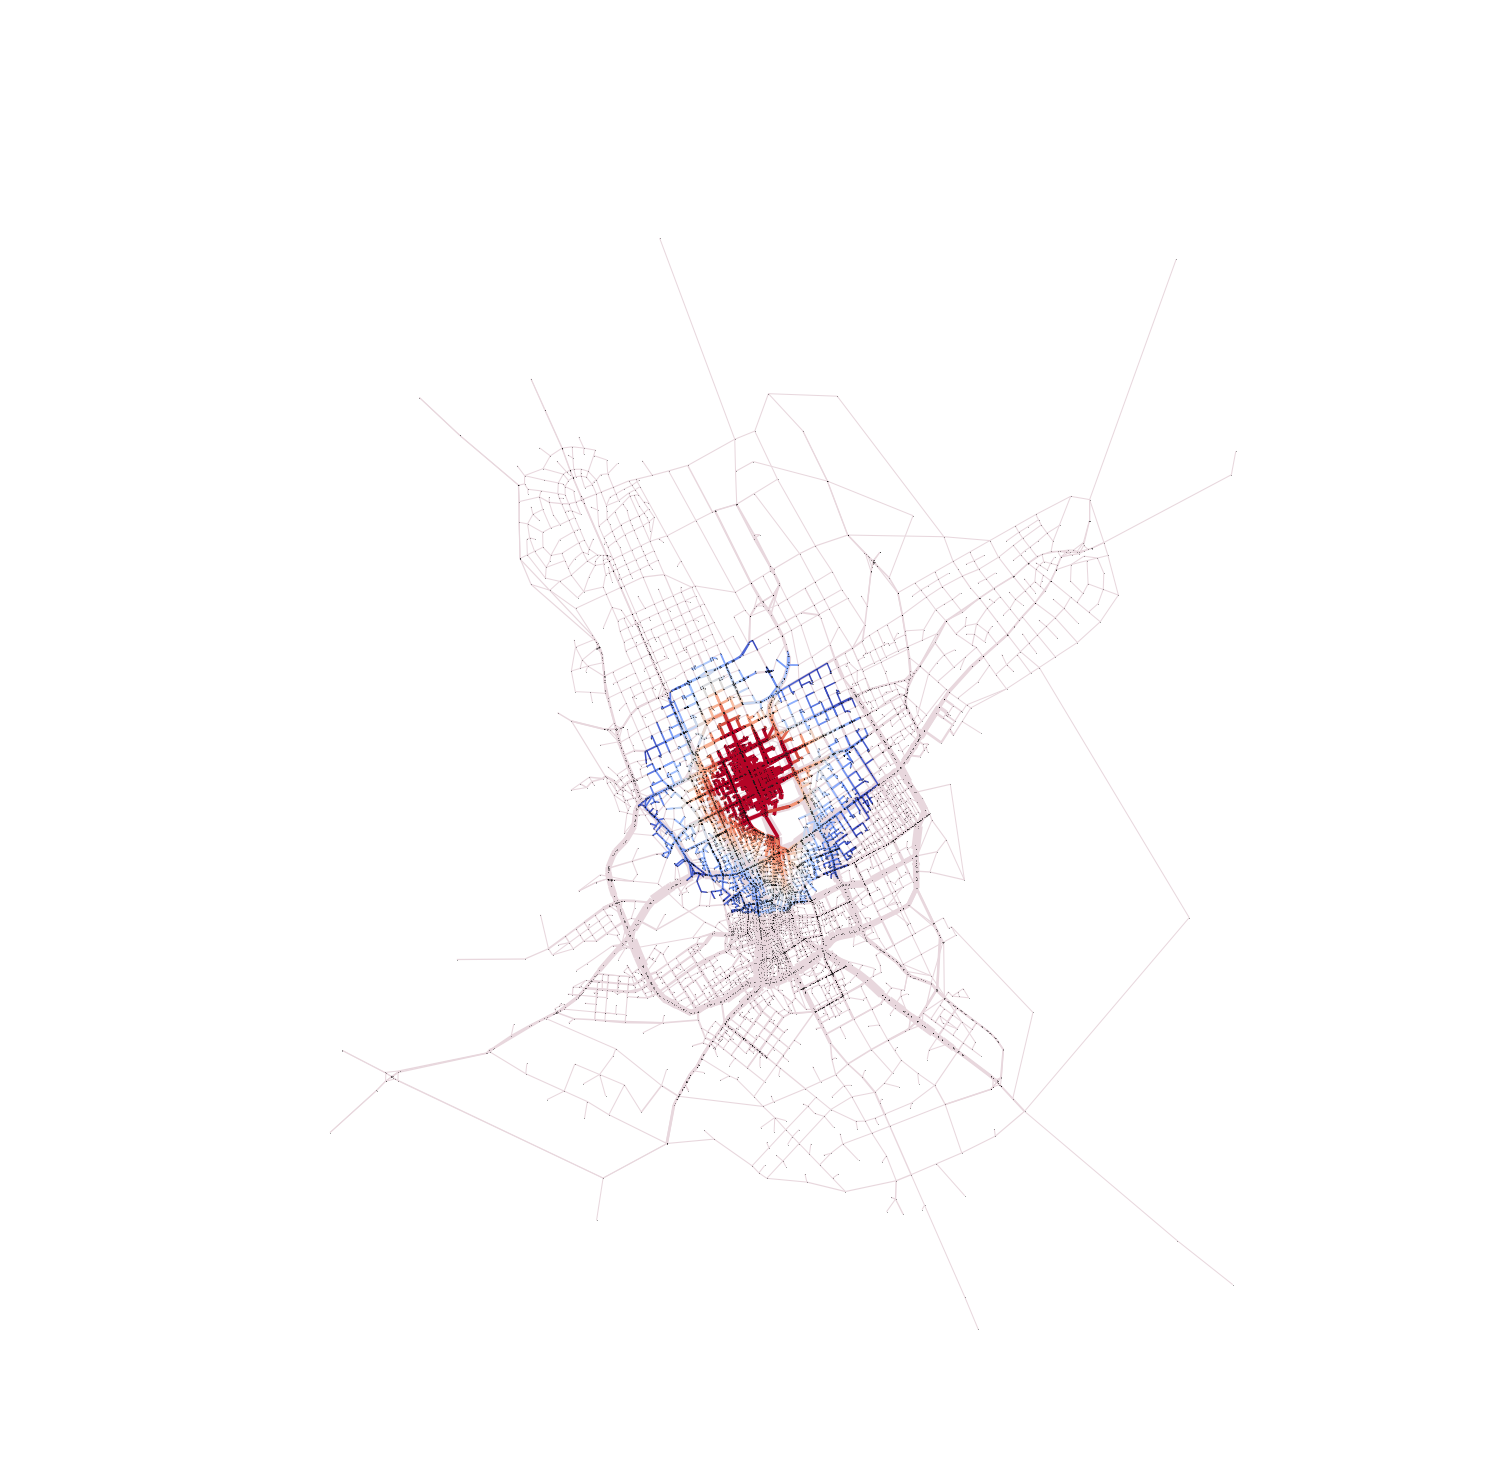

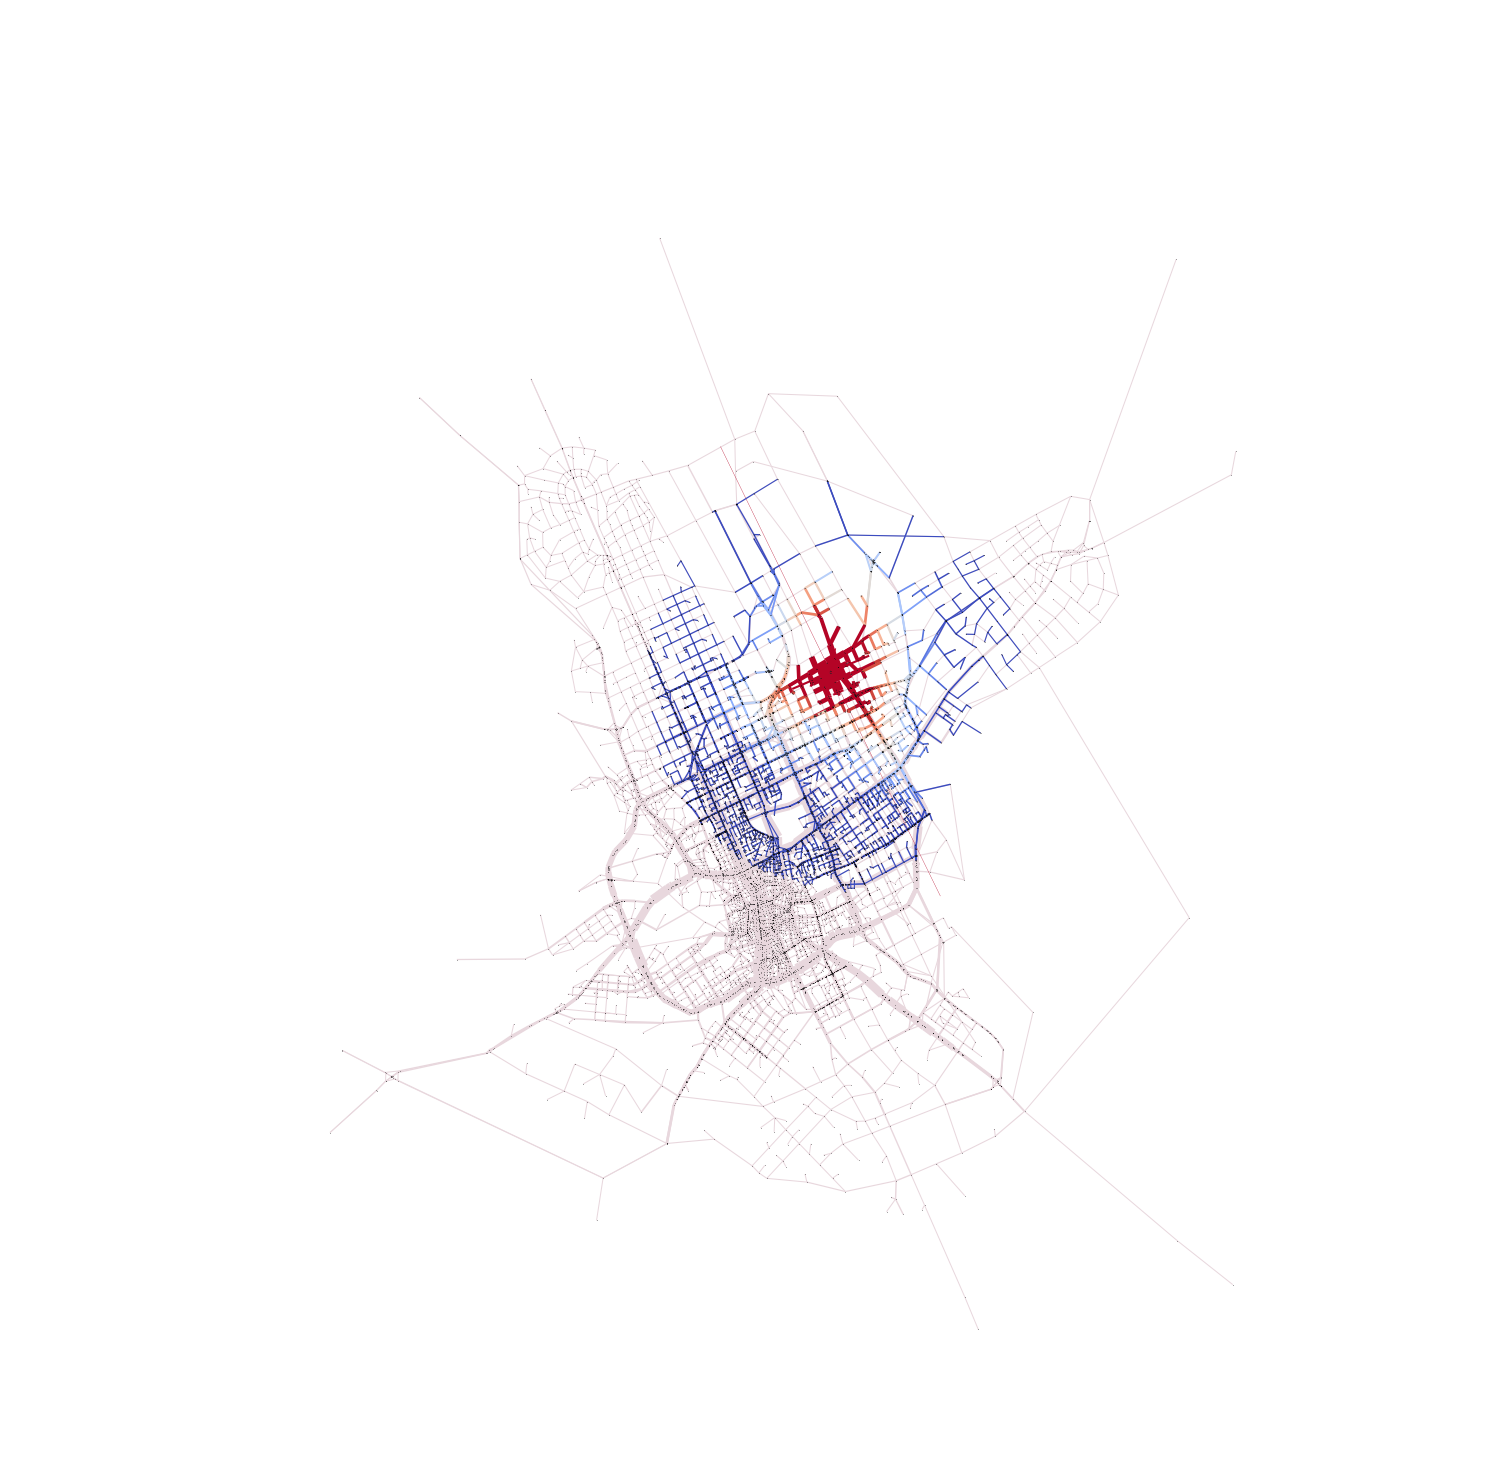

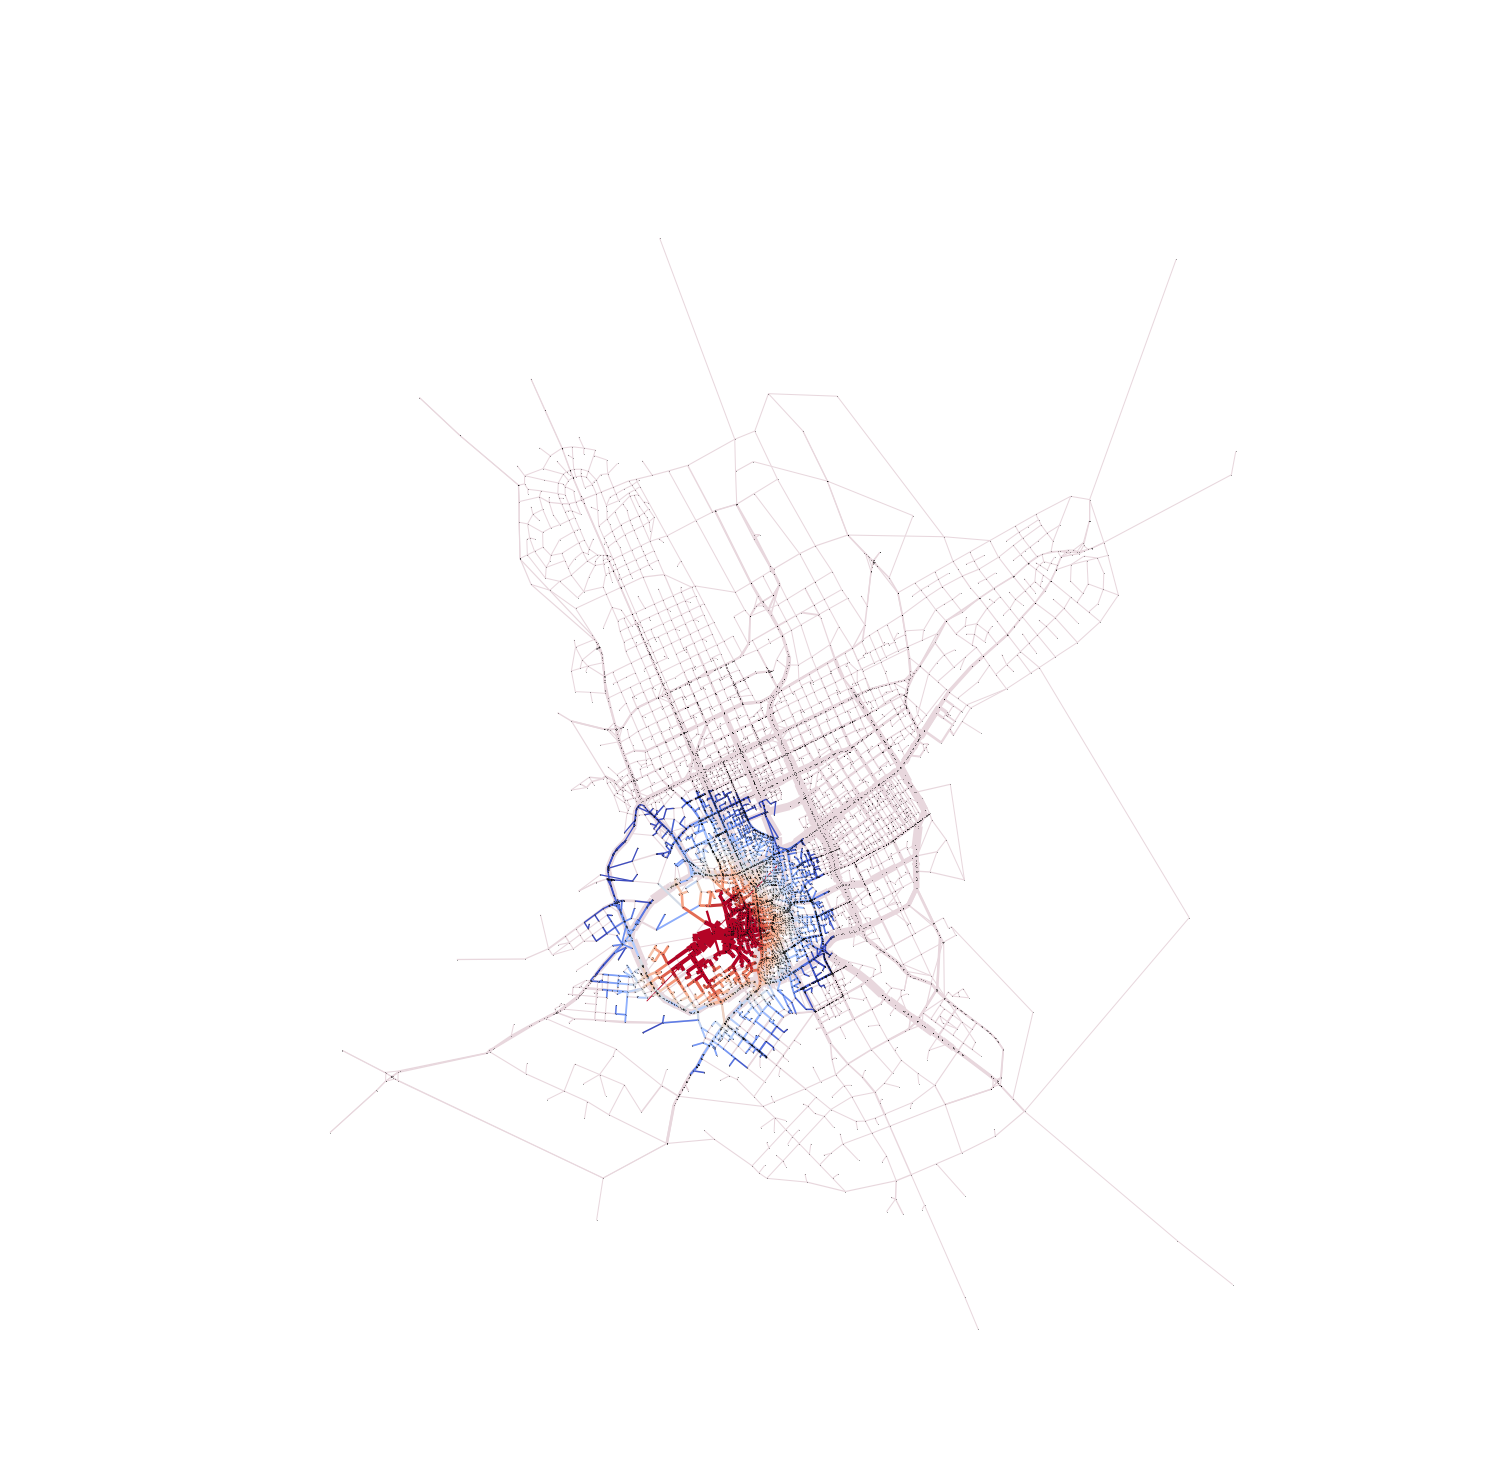

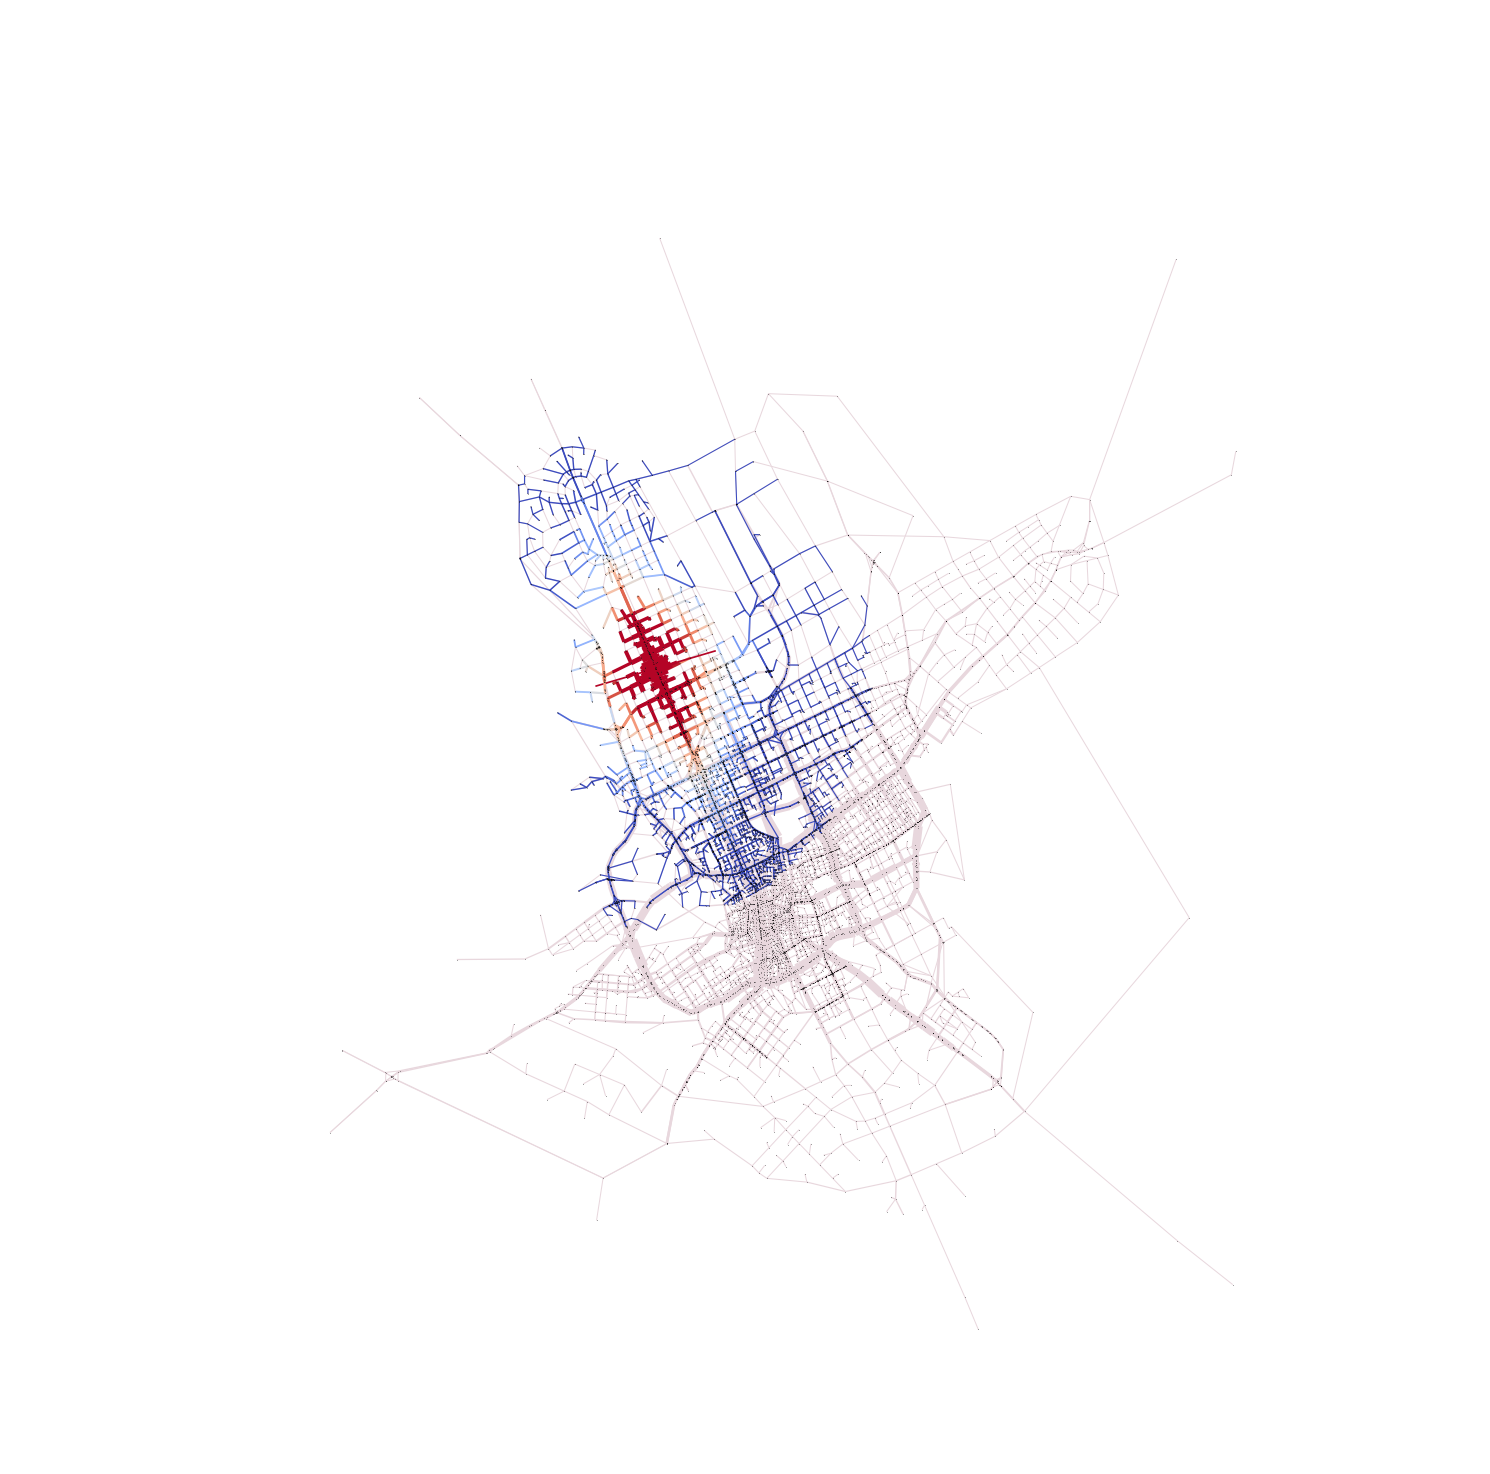

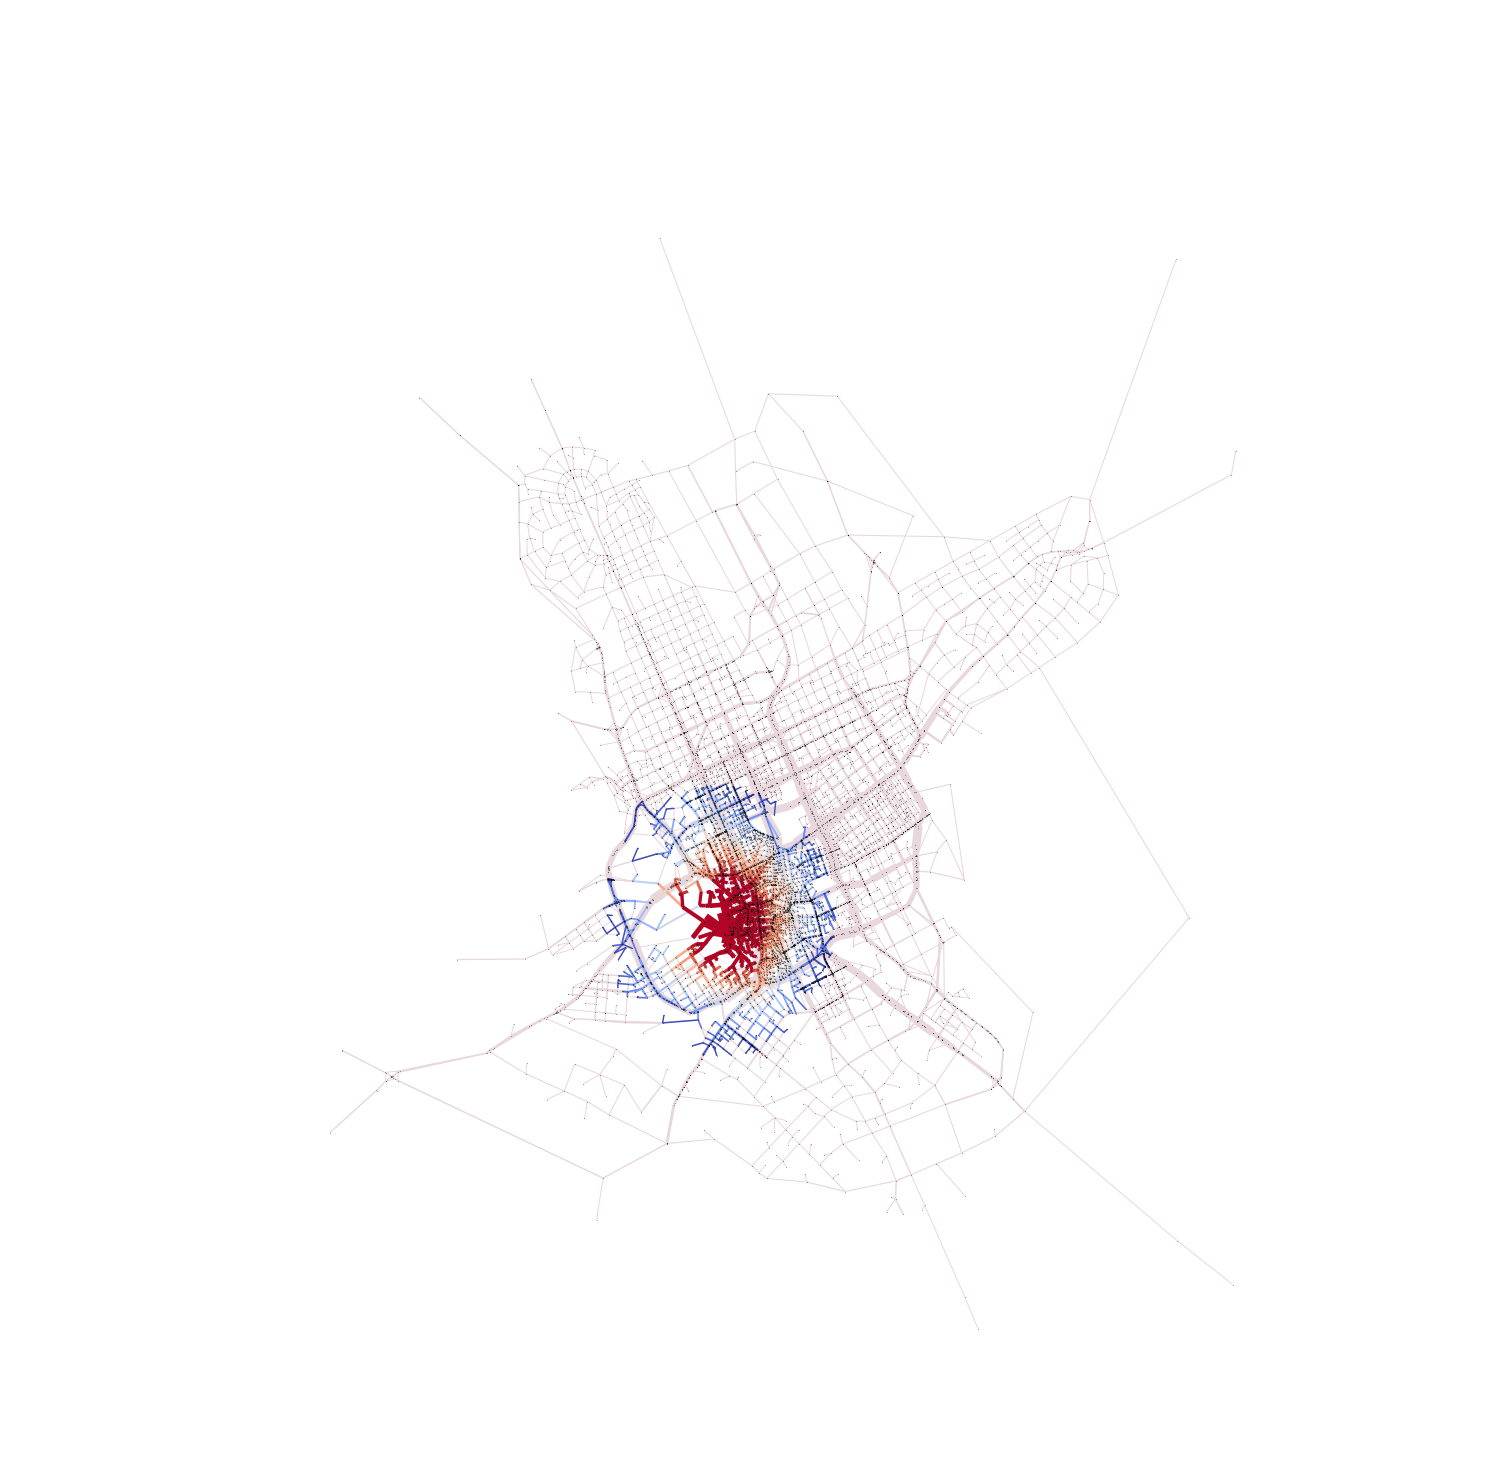

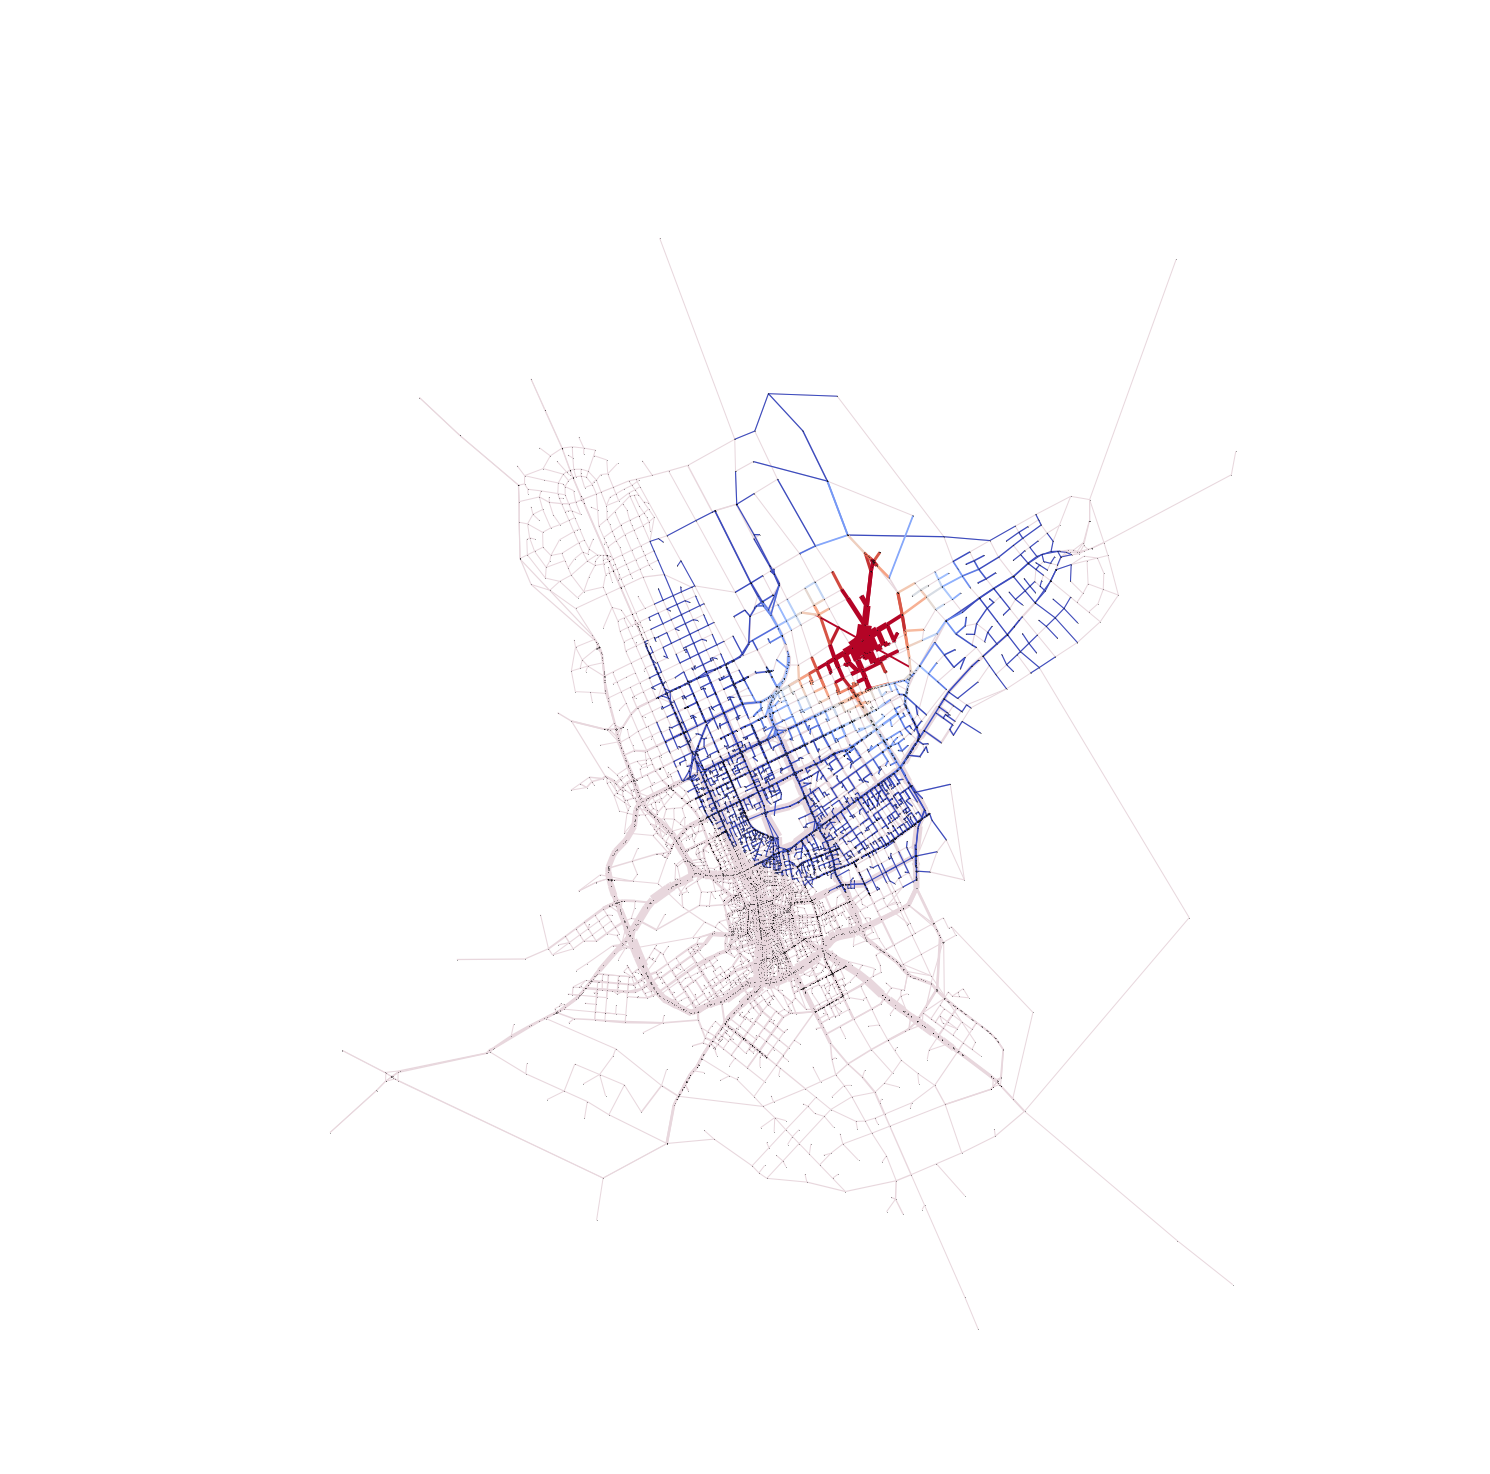

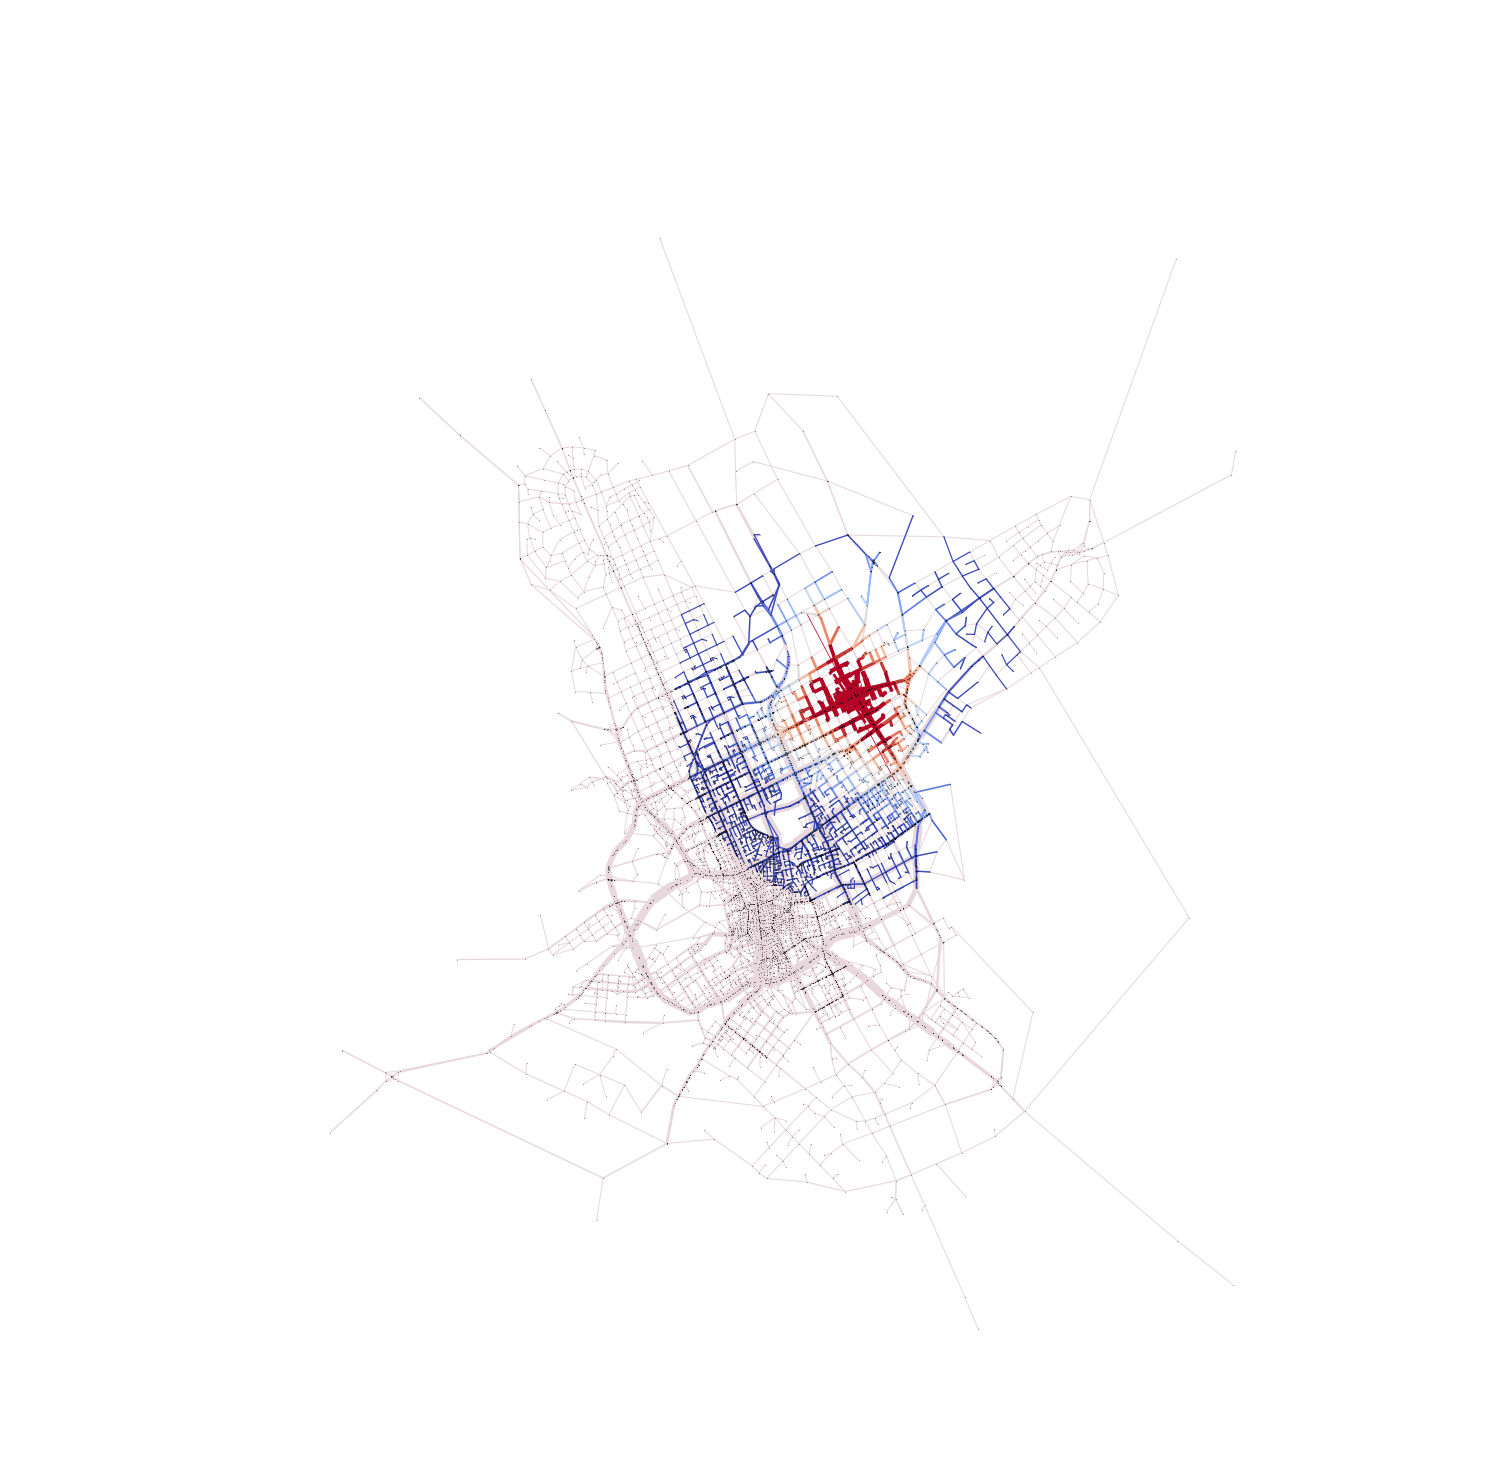

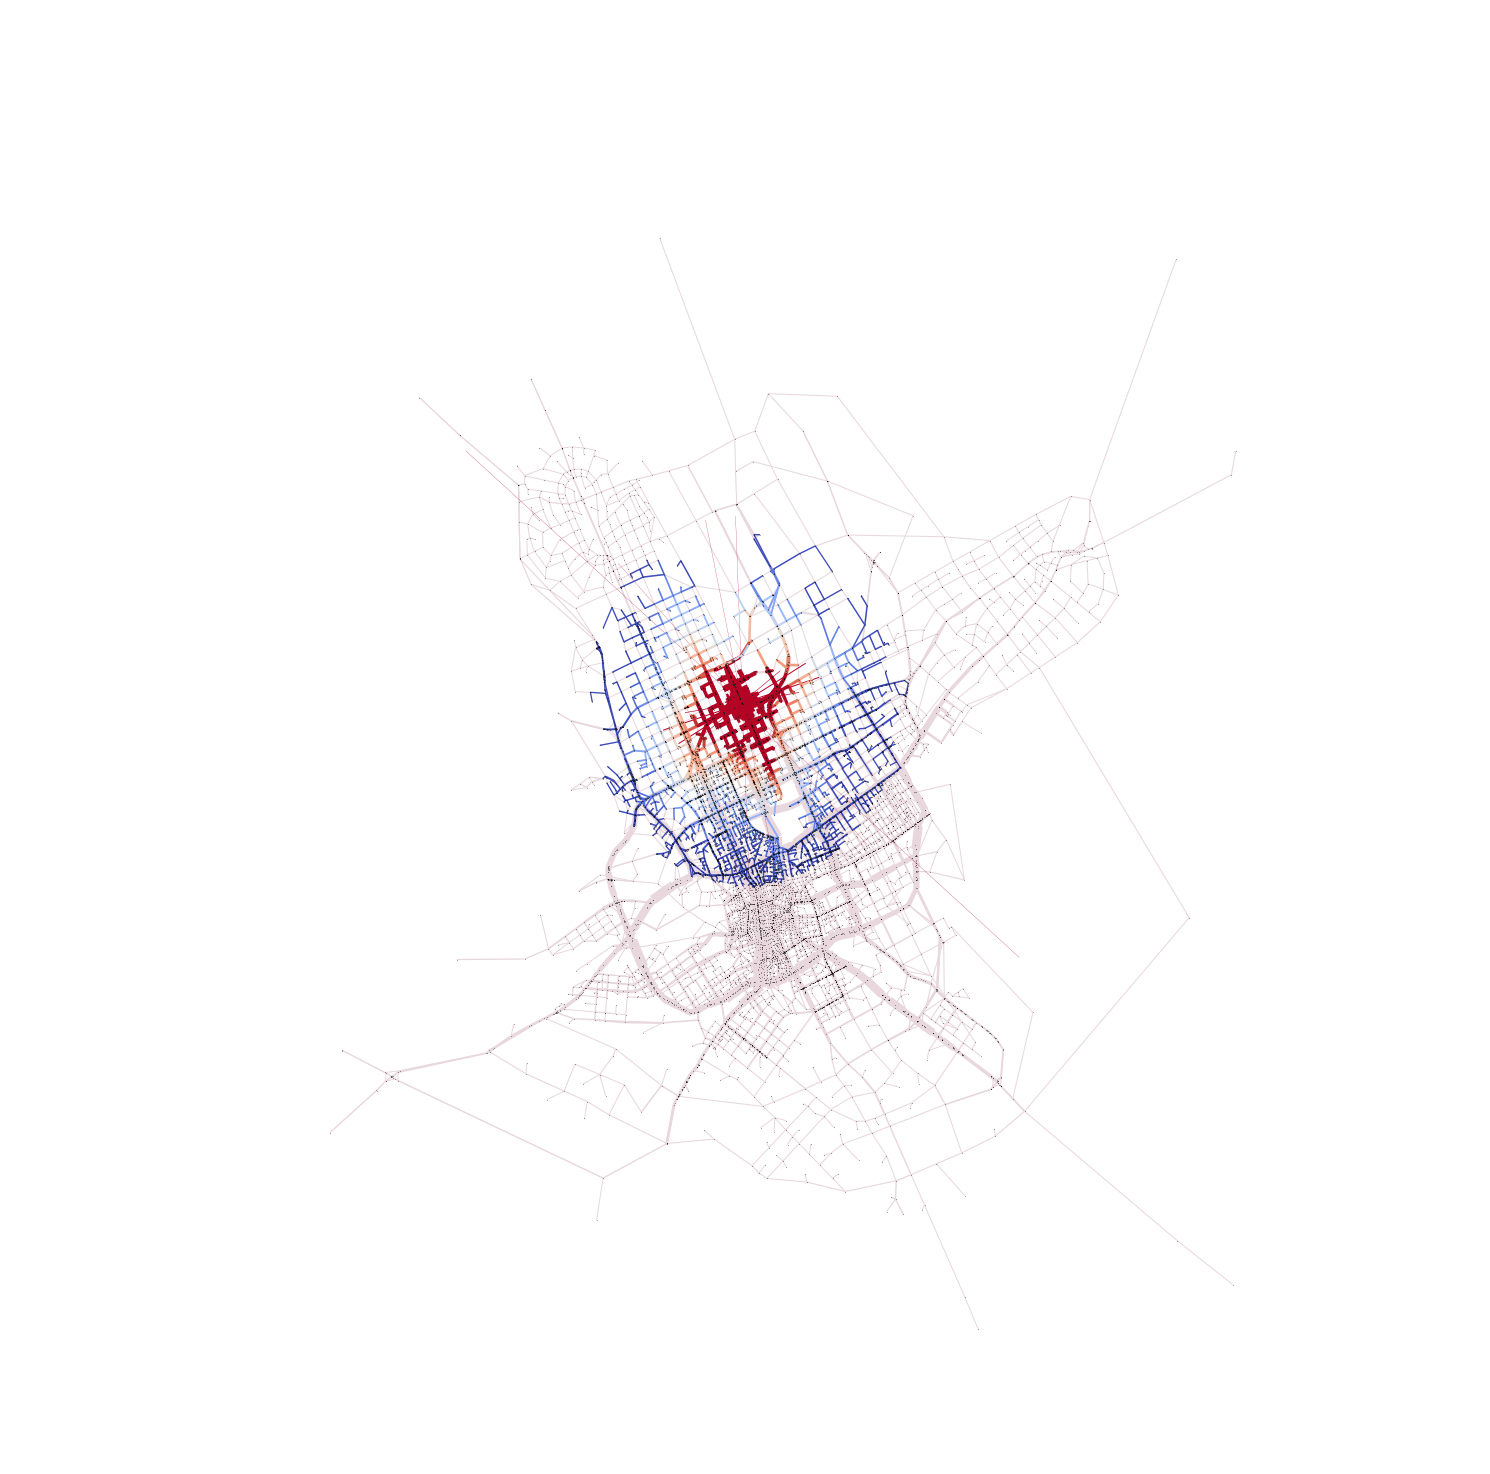

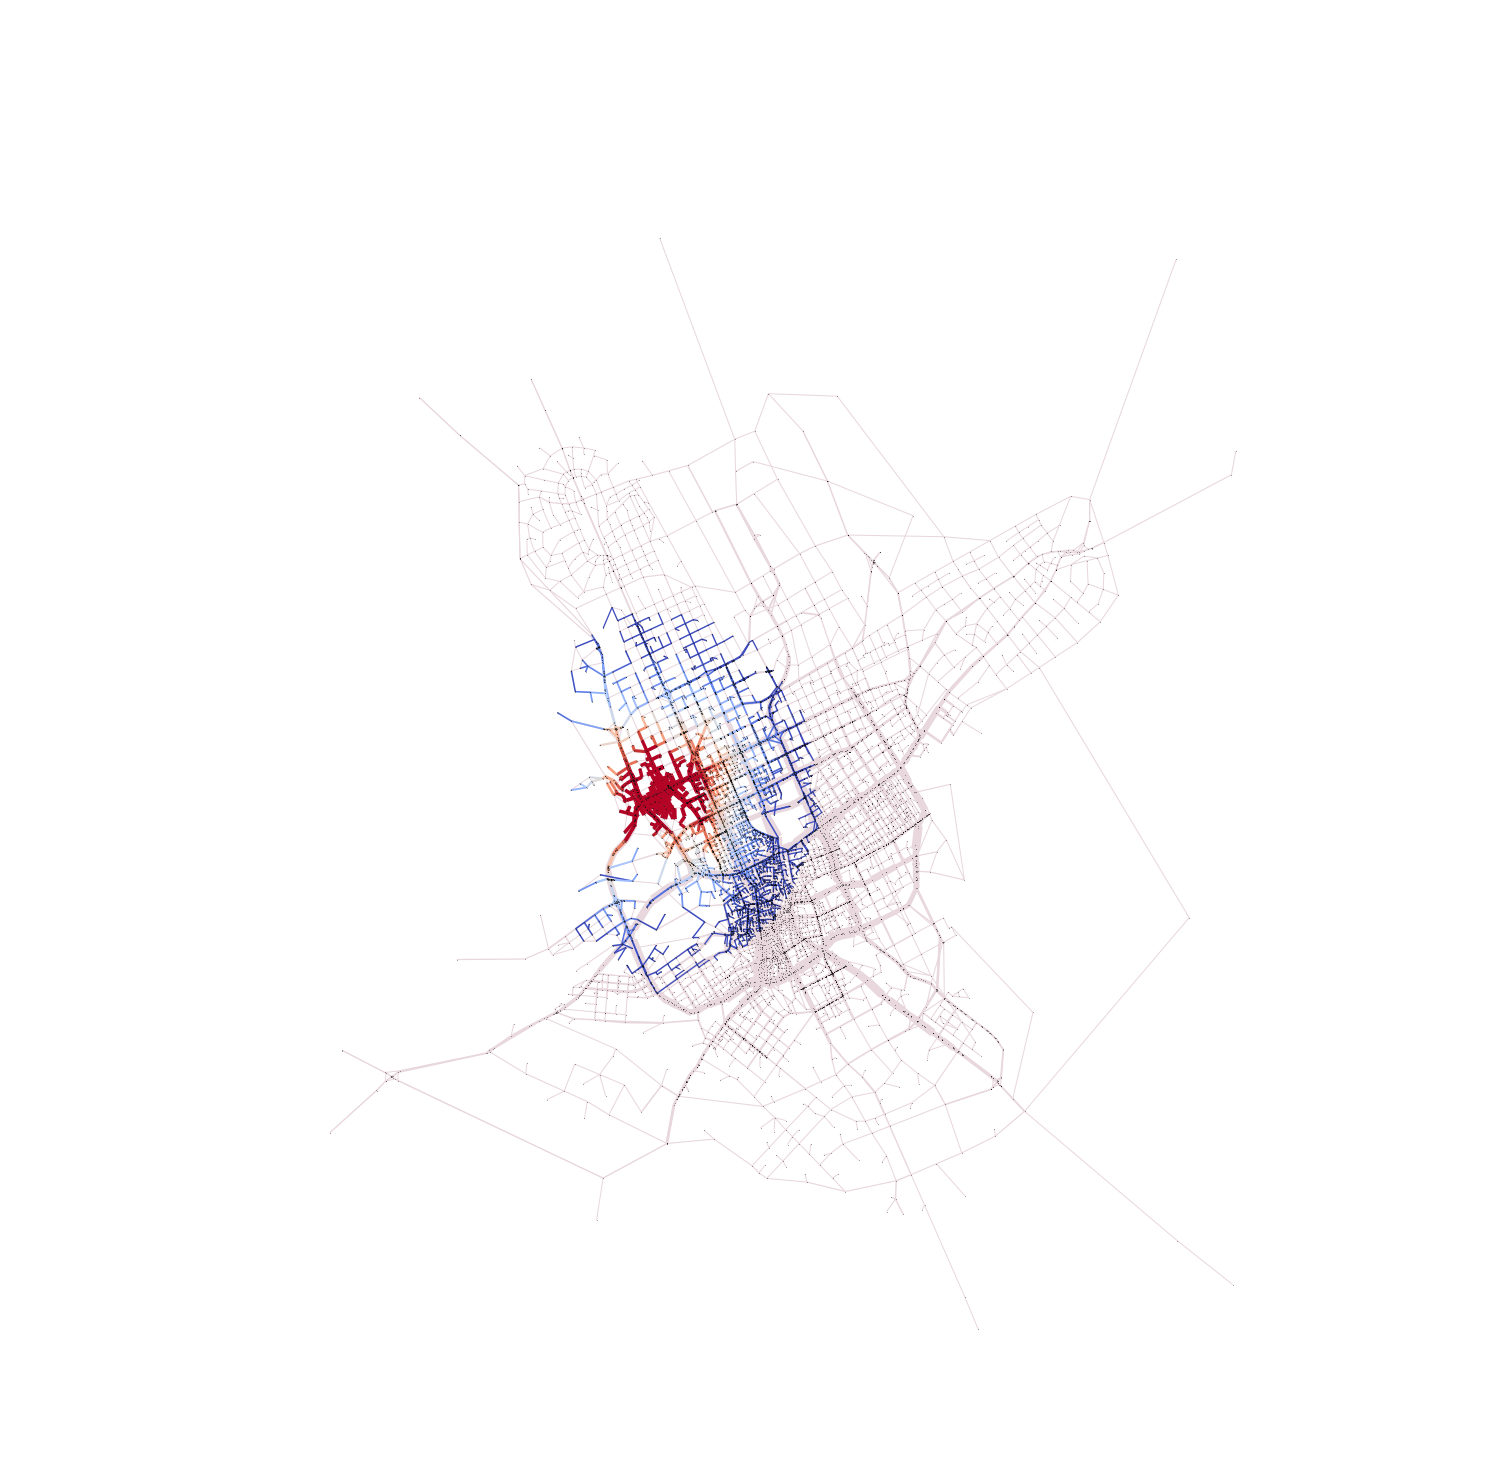

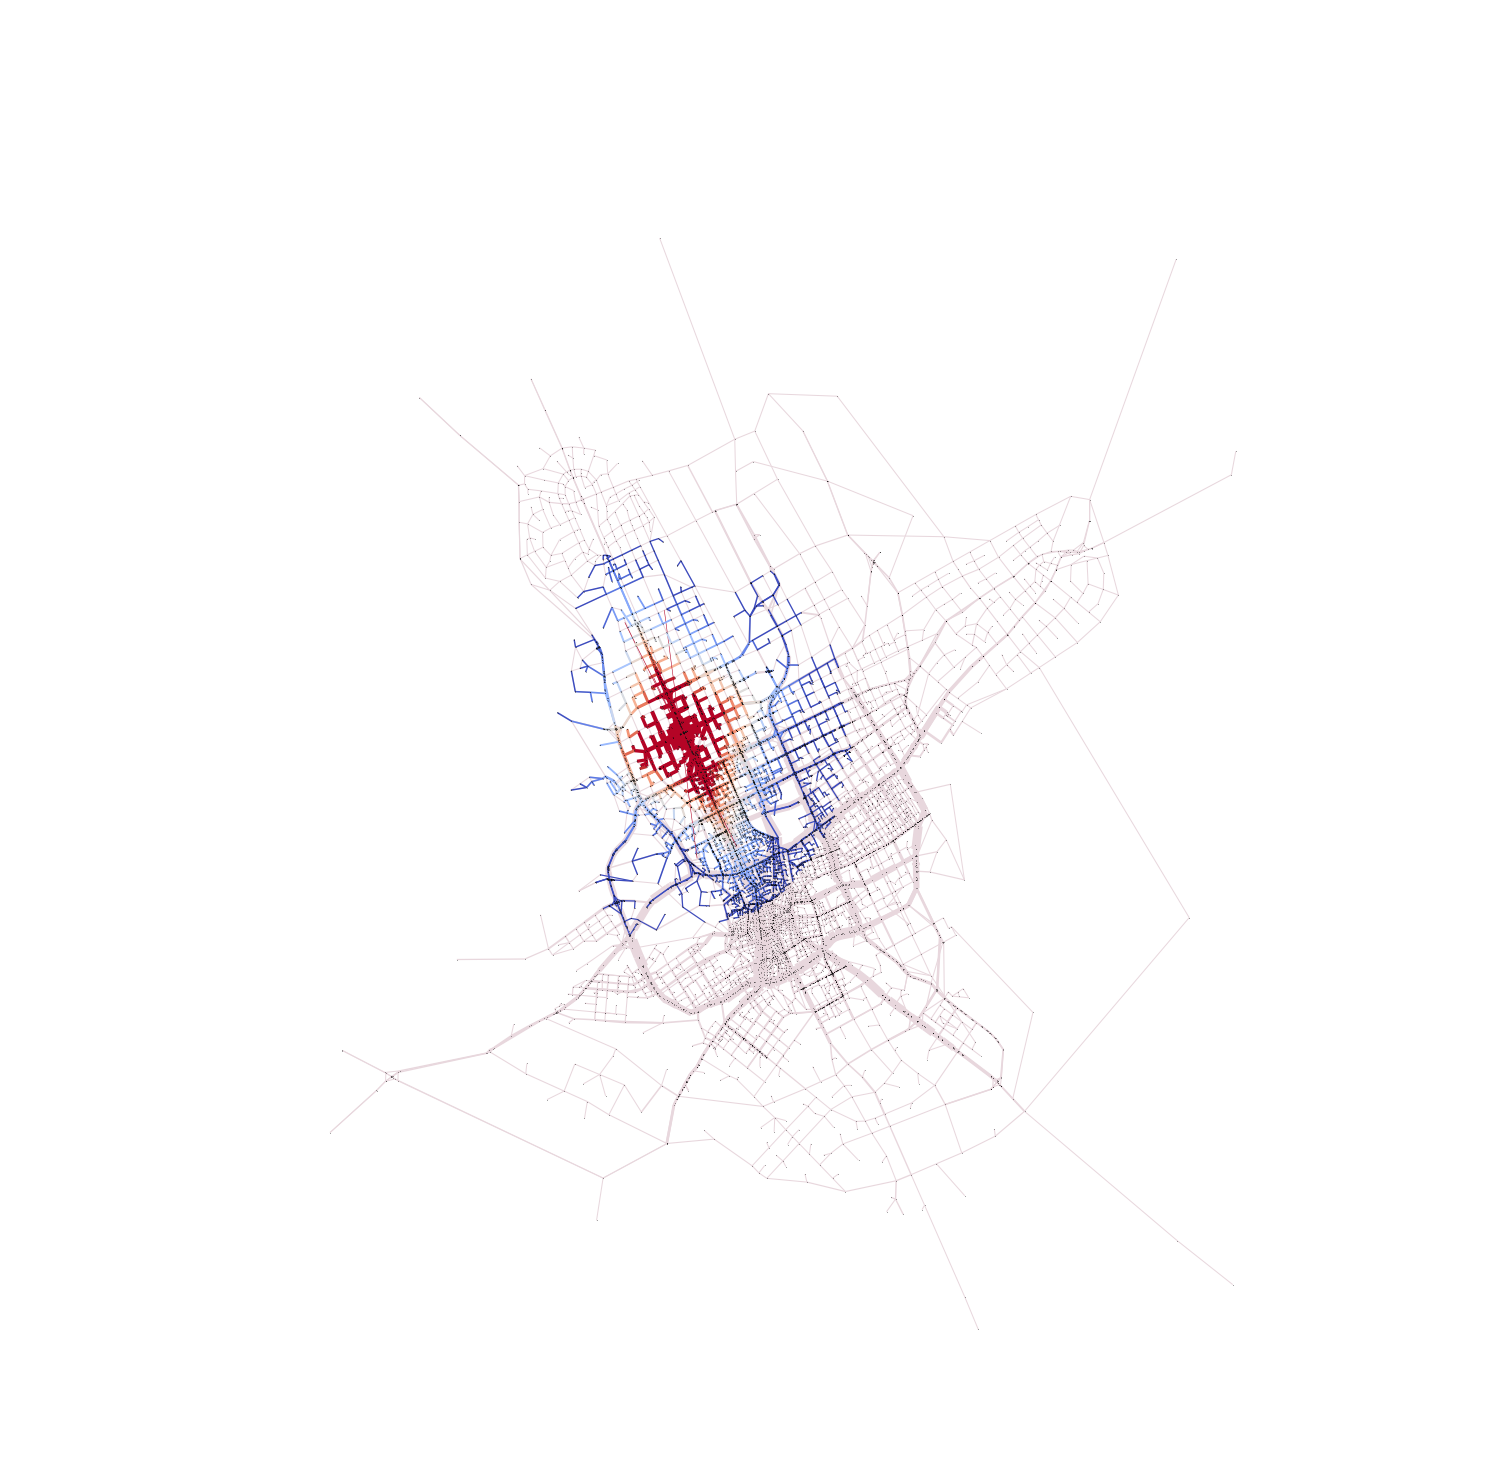

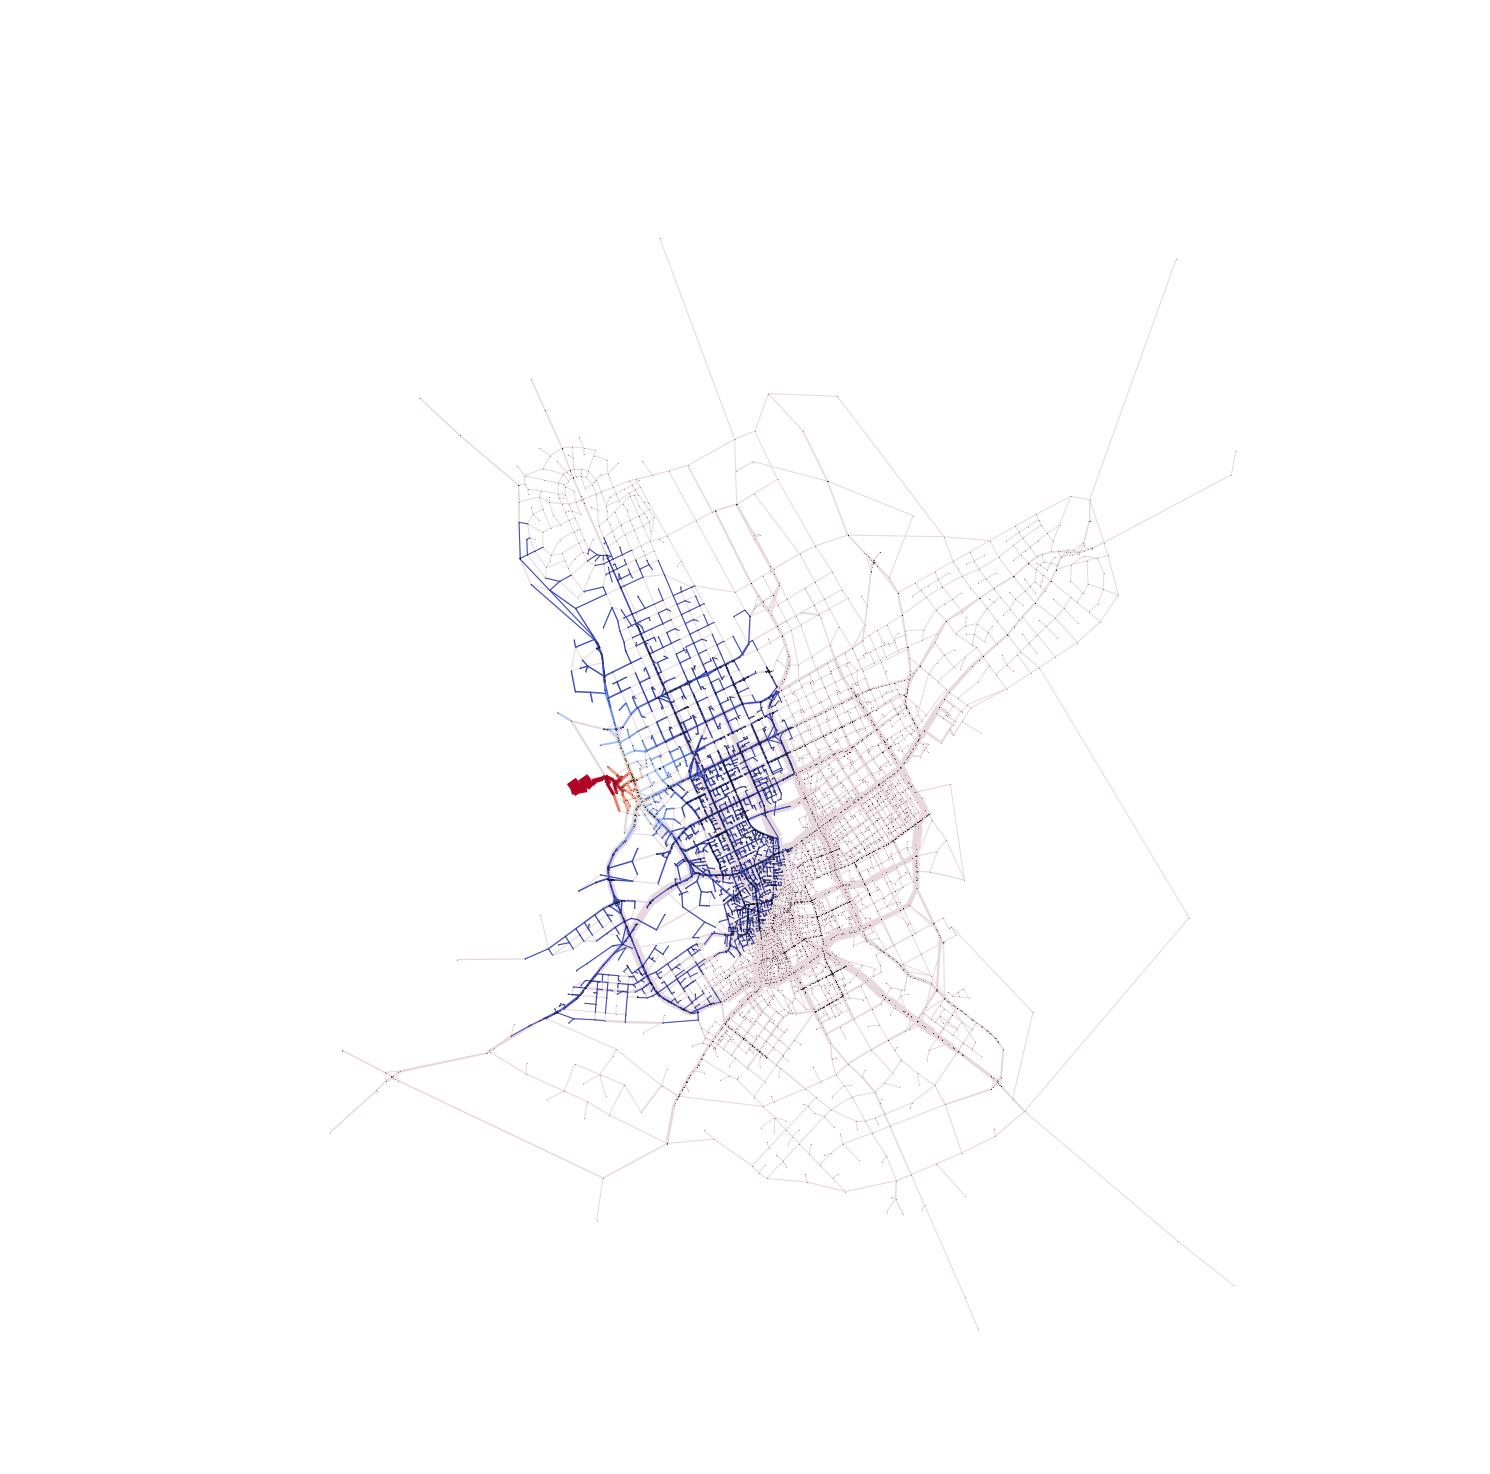

In [5]:
#11. *******Now we caculate the Manhattan District Algorithm
import operator
import math
import json

for start in start_node[29:]:
    distance = {}
    for node_id in RG.nodes():
        x1=RG.node[start]["coordinate"][0]
        y1=RG.node[start]["coordinate"][1]
        x2=RG.node[node_id]["coordinate"][0]
        y2=RG.node[node_id]["coordinate"][1]
        distance[node_id] = math.sqrt(math.pow((x1-x2),2)+math.pow((y1-y2),2))
    #12. *******Now we sort the distance by Manhattan District algorithm, and have a sorted list "end_list"
    sorted_distance = sorted(distance.items(), key = operator.itemgetter(1))
    end_list = []
    for i in sorted_distance:
        end_list.append(i[0])

    #15. use nx.dijkstra_path(G,node_start,node_end, weight) to caculate shortest paths
    # define the scope that how many closest points take into account*************************************####change_2
    # scope 1000 ~ 5 minutes, 3000 ~ 10 minutes, 5000~20 minutes, 6000 ~ 30 minutes
    scope = 5000 
    path_dict = {start:[]}
    for end in end_list[:scope]:  # [:x] control how many nodes in loop as end_point
        try:
            short_path = nx.dijkstra_path(RG, start, end, weight='travel_time')
            path_dict[start].append({end:short_path})
        except:
            pass
    with open("txt/"+str(start)+".txt", "w") as text_file:
        text_file.write(json.dumps(path_dict))
        print "* Done writting txt flie with Start Node: " + str(start)       
    #17. Let's define a new empty undirected graph "Shortest_RG".
    Shortest_RG = nx.Graph()
    sum_time = {}
    sum_dist = {}
    tmp_edges = []
    for j in range(len(path_dict[start])):        
        tmp_dict= path_dict[start][j]
        tmp= tmp_dict.values()
        tmp_list= tmp[0]
        time_list = []
        dist_list = []
        if len(tmp_list) > 1:
            for x in range(len(tmp_list)-1):
                o_id = tmp_list[x]
                d_id = tmp_list[x+1]                  
                time_list.append(round(RG[o_id][d_id]["travel_time"],2)) 
                dist_list.append(round(degree2km(o_id,d_id),2))
                tmp_sum_time = round(sum(time_list),2)
                tmp_sum_dist = round(sum(dist_list),2)
                #Here define the max time: 30 minutes**************************************************#####change_3
                if tmp_sum_time < 30: 
                    sum_time[(o_id,d_id)] = tmp_sum_time
                    sum_dist[(o_id,d_id)] = tmp_sum_dist
                    new_edge_attr = RG[o_id][d_id]
                    Shortest_RG.add_edge(*(o_id,d_id), sum_time=round(sum(time_list),2))
                    Shortest_RG[o_id][d_id]["sum_dist"]= round(sum(dist_list),2)
        ##print "\n"
    print "* Done Caculate "+str(len(Shortest_RG.edges()))+" paths from Node_" + str(start)
    sorted_time = sorted(sum_time.items(), key = operator.itemgetter(1))
    sorted_dist = sorted(sum_dist.items(), key = operator.itemgetter(1))
    sorted_time.reverse()
    sorted_dist.reverse()
    print "* The max_time/Minute is: "+str(sorted_time[0])+"and max_distance/KM is: "+str(sorted_dist[0])
    # last_id = Shortest_RG.edges()[len(Shortest_RG.edges())-1]
    # print Shortest_RG.edge[last_id[0]][last_id[1]]

    #18. Now we can add node coordinates for Shortest_RG and plot the overlay map
    loc_dict_sh = {}
    for node_index in Shortest_RG.nodes():
        loc_dict_sh[node_index] = RG.node[node_index]["coordinate"]
        Shortest_RG.node[node_index]["coordinate"] = RG.node[node_index]["coordinate"]
        ##print loc_dict[node_index]
    degrees_sh = nx.degree(Shortest_RG)
    node_sizes_sh = []
    for i in Shortest_RG.nodes():
        node_sizes_sh.append(degrees_sh[i])
    node_colors_sh = range(len(Shortest_RG.nodes()))
    edges_sh = Shortest_RG.edges()
    weights_time = [15/Shortest_RG[u][v]["sum_time"] for u,v in edges_sh]
    weights_time_2 = [u+0.5 for u in weights_time]
    weights_dist = [15/Shortest_RG[u][v]["sum_dist"] for u,v in edges_sh]
    weights_dist_2 = [u+0.5 for u in weights_dist]
    edge_colors_sh = plt.cm.coolwarm(np.log(weights_dist))

    plt.figure(figsize=(20,20))
    ##nx.draw(FSQ, pos=loc_fsq, node_size=fsq_sizes, node_color=fsq_colors);
    nx.draw(RG, pos=loc_dict, node_size=0.1, width=weights, node_color="black", edge_color = "#e8d7dd");
    nx.draw(Shortest_RG, pos=loc_dict_sh, 
            node_size=0.2, node_color=node_colors_sh, width=weights_dist_2, edge_color=edge_colors_sh);
    #nx.draw_networkx_labels(Shortest_RG,pos=loc_dict); # semicolon suppresses output
    plt.savefig("png/paths_node"+ str(start)+ ".png", format="PNG")

    #19. Now construct the multi-tier dictionary structures
    # Build the 1st tier dictionary, called \"geoDataSet\".\n",
    geoDataSet  = {}
    geoDataSet["type"] = "FeatureCollection"
    geoDataSet["features"] = []
    for i in Shortest_RG.edges():   
        id_o = i[0]
        id_d = i[1]
        tmp_dict = {}
        tmp_dict["type"] = "Feature"
        tmp_dict["properties"]= Shortest_RG.edge[id_o][id_d]
        tmp_dict["geometry"] = {}
        tmp_dict["geometry"]["type"] = "LineString"
        tmp_x1 = Shortest_RG.node[id_o]['coordinate'][0]
        tmp_y1 = Shortest_RG.node[id_o]['coordinate'][1]
        tmp_x2 = Shortest_RG.node[id_d]['coordinate'][0]
        tmp_y2 = Shortest_RG.node[id_d]['coordinate'][1]
        tmp_dict["geometry"]["coordinates"] = [[tmp_x1,tmp_y1],[tmp_x2,tmp_y2]]                  
        geoDataSet["features"].append(tmp_dict)
    #20. Dump geoDataSet to json **************
    with open("data/json/"+str(start)+".json", "w") as text_file:
        text_file.write(json.dumps(geoDataSet))
        print "Done writting JSON file and PNG file with Start Node: " + str(start) + "\n"

In [3]:
#Combine json files to one huge Json*********************************************************************************
from os import listdir
from os.path import isfile, join
import json
onlyfiles = [f for f in listdir("data/json/") if isfile(join("data/json/", f))]

all_json = {}
for f in onlyfiles:
    if f.endswith('.json'):
        node_index = f[:f.index('.')]
        with open("data/json/"+f, "r") as text_file:
            text_content = text_file.read()
            eq_index = text_content.index('{')
            this_json = json.loads(text_content[eq_index:])
            all_json[node_index] = this_json            

with open("data/json/some/all_nodes.json", "w") as text_file:
    text_file.write('var all_json='+json.dumps(all_json))
    print "Done writting Huge JSON file"

Done writting Huge JSON file


In [13]:
#21. Now construct the multi-tier dictionary structures for foursquare checkin points.
import json
print FSQ.node[1]

geoDataSet  = {}
geoDataSet["type"] = "FeatureCollection"
geoDataSet["features"] = []

for i in FSQ.nodes():      
    if FSQ.node[i]['closest_node'] in start_node:
        tmp_dict = {}
        tmp_dict["properties"]={}
        tmp_dict["type"] = "Feature"
        tmp_dict["properties"]["category"]= FSQ.node[i]['category']
        tmp_dict["properties"]["checkin"]= FSQ.node[i]['checkin']
        tmp_dict["properties"]["id"]= FSQ.node[i]['fsq_id']
        tmp_dict["properties"]["closest_node"]= FSQ.node[i]['closest_node']
        tmp_dict["geometry"] = {}
        tmp_dict["geometry"]["type"] = "Point"
        tmp_x1 = FSQ.node[i]['coordinate'][0]
        tmp_y1 = FSQ.node[i]['coordinate'][1] 
        tmp_dict["geometry"]["coordinates"] = [tmp_x1,tmp_y1]                 
        geoDataSet["features"].append(tmp_dict)
    #22. dump geoDataSet to json
with open("data/json/some/"+"fsq_checkin"+".json", "w") as text_file:
    text_file.write(json.dumps(geoDataSet))
    print "Done writting with Nodes: " + "Foursquare Checkin Json" + "\n"

{'category': 'Coffee Shop', 'name': 'Centria | \xbf_\xaa\xe6\xbf\xe9\xbf\xb1\xaa_\xbf_', 'checkin': 73327, 'fsq_id': '4c892e4897828cfa5630a2aa', 'coordinate': (46.683923010000001, 24.697129180000001), 'closest_node': 5808}
Done writting with Nodes: Foursquare Checkin Json

